***
# **<p style="text-align: center;">LAB 2: Computational Statistics</p>**
### <p style="text-align: center;">- Emilio PICARD -</p>

***

## **Setup**

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import norm

In [5]:
np.random.seed(1234)

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# **Exercise 1**

In [4]:
# Question 2
from utils1 import get_samples

# Question 3
n = 10 # number of candidates
x_cand = np.array([i for i in range(n)]) # values of the candidates
prob_samples = np.random.rand(n)
probs = prob_samples / np.sum(prob_samples)

N = 10000 # number of samples
samples = get_samples(x_cand, prob=probs, N=N)

#### **Theoritical vs Empirical distribution**

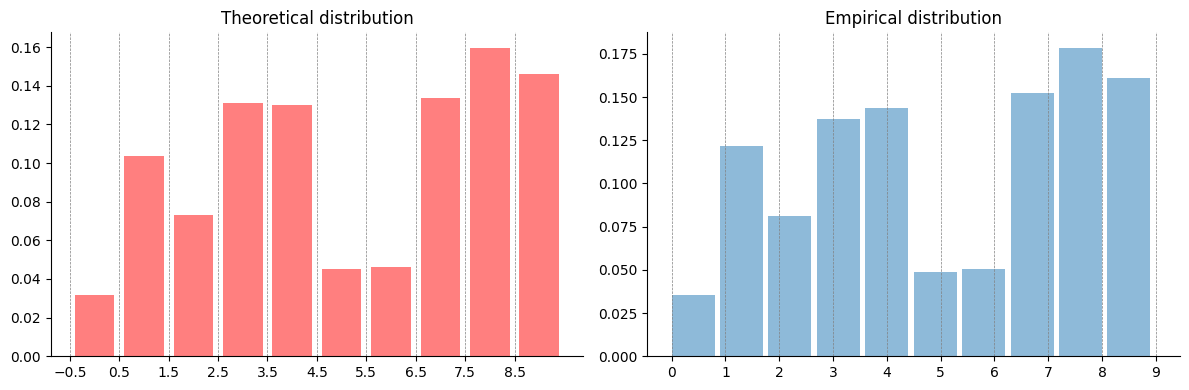

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('Theoretical distribution')
ax[0].bar(x_cand, probs, color='red', alpha=0.5)
ax[0].set_xticks(ticks=x_cand-1/2)
ax[0].xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

ax[1].set_title('Empirical distribution')
ax[1].hist(samples, bins=n, density=True, alpha=0.5, width=.8)
ax[1].set_xticks(ticks=x_cand)
ax[1].xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


# **Exercise 2**

In [5]:
from utils1 import GaussianMixtureModel

### Samples of the gaussian mixture model

In [196]:
N = 1000

X1 = np.random.multivariate_normal([0, 0], [[5, 4.5], [4.5, 5]], N // 3)
X2 = np.random.multivariate_normal([6, 3], [[1.5, -1], [-1, 1.5]], N // 3)
X3 = np.random.multivariate_normal([3, 8], [[4, -3.8], [-3.8, 4]], N // 3)
X = np.vstack([X1, X2, X3])

### If the samples are of dim 1, we can observe the theorical distribution

In [429]:
# assert
assert type(gmm_samples[0]) == float, 'not a good dim for this plot'

# plot
x = np.linspace(-5, 5, 1000)
gmm_pdf = np.zeros_like(x)

fig, ax = plt.subplots(figsize=(6, 4))

# Plot each gaussian
for i in range(m):
    pdf = alpha[i] * norm.pdf(x, mus[i], sigmas[i])
    gmm_pdf += pdf
    ax.plot(x, pdf, label=f'Component {i+1}')

# Plot the overall GMM
ax.plot(x, gmm_pdf, label='Overall GMM', linewidth=2, color='black')
ax.set_title('Theoretical Gaussian Mixture Model')
ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.legend()

plt.grid()
plt.tight_layout()
plt.show()

NameError: name 'gmm_samples' is not defined

### **EM Algorithm**

In [197]:
gmm = GaussianMixtureModel(n_clusters=3, dim=2, max_iters=100)
gmm.fit(X)

Convergence atteinte à l'itération 29


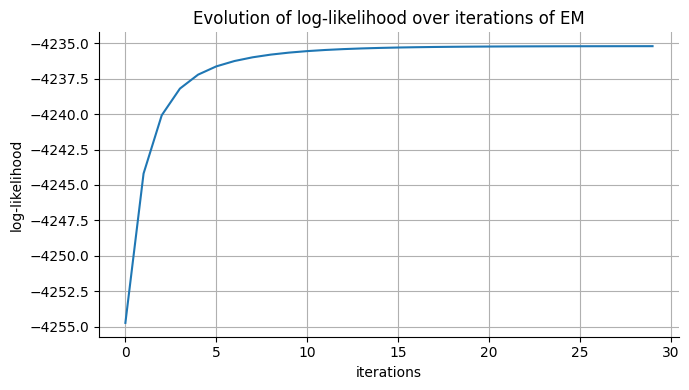

In [198]:
fig = plt.figure(figsize=(7, 4))
plt.plot(gmm.log_likelihoods)
plt.title("Evolution of log-likelihood over iterations of EM")
plt.xlabel('iterations')
plt.ylabel('log-likelihood')
plt.tight_layout()
plt.grid(True)
plt.show()

In [199]:
hat_mus = gmm.mus
hat_sigmas = gmm.sigmas
hat_alphas = gmm.alphas

alpha = np.array([0.33, 0.33, 0.33])
sigmas = np.array([[[5, 4.5], [4.5, 5]], [[1.5, -1], [-1, 1.5]], [[4, -3.8], [-3.8, 4]]])
mus = np.array([[0, 0], [6, 3], [3, 8]])

print(f"distance between true and estimated alphas: {np.linalg.norm(alpha - hat_alphas)}")
print(f"distance between true and estimated mus: {np.linalg.norm(mus - hat_mus)}")
print(f"distance between true and estimated sigmas: {np.linalg.norm(sigmas - hat_sigmas)}")

predictions = gmm.predict(X)

distance between true and estimated alphas: 0.00983899498697456
distance between true and estimated mus: 9.625890992981347
distance between true and estimated sigmas: 12.899661745857484


In [6]:
from utils1 import plot_results

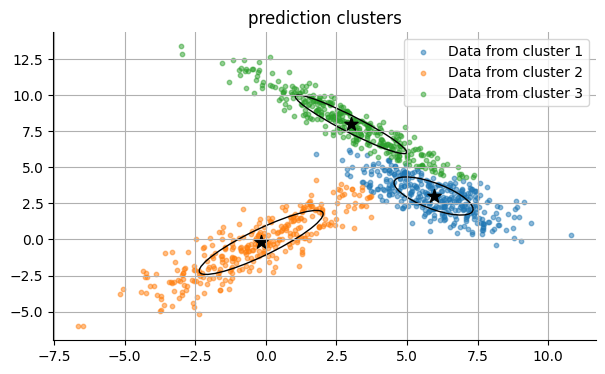

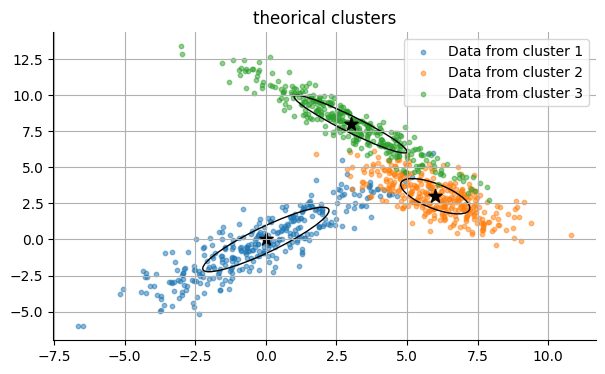

<Figure size 640x480 with 0 Axes>

In [202]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

n_clusters = 3
title = "prediction clusters"
plot_results(n_clusters, X, gmm.predict(X), hat_mus, hat_sigmas, title)
z_0 = np.zeros(N//3)
z_1 = np.ones(N//3)
z_2 = np.ones(N//3) * 2
z = np.hstack((z_0, z_1, z_2)).squeeze()

title = "theorical clusters"
plot_results(n_clusters, X, z, mus, sigmas, title)
plt.tight_layout()
plt.show()


**Question 5: APPLICATION**

In [ ]:
import pandas as pd
from utils1 import compute_bic

df = pd.read_csv('WPP2024_Demographic_Indicators_Medium.csv', low_memory=False)[['CBR', 'CDR']].dropna()
X = df.to_numpy()
n_samples, n_dims = X.shape

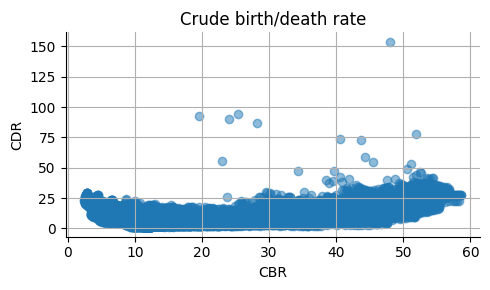

In [8]:
# Plottting the dataset
plt.figure(figsize=(5,3))
plt.title('Crude birth/death rate')
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.xlabel('CBR')
plt.ylabel('CDR')
plt.grid()
plt.tight_layout()
plt.show()

In [10]:
n_clust_max = 6
bic_scores = []
gmm_models = []
for n_clusters in range(1, n_clust_max):
    gmm = GaussianMixtureModel(n_clusters=n_clusters, dim=2, max_iters=100)
    gmm.fit(X)
    gmm_models.append(gmm)
    bic_scores.append(compute_bic(X, gmm))    

Convergence atteinte à l'itération 1
Convergence atteinte à l'itération 54


In [321]:
best_index = np.argmin(bic_scores)
best_m = best_index + 1
print(f"Optimal number of clusters (based on BIC): {best_m}")

Optimal number of clusters (based on BIC): 11


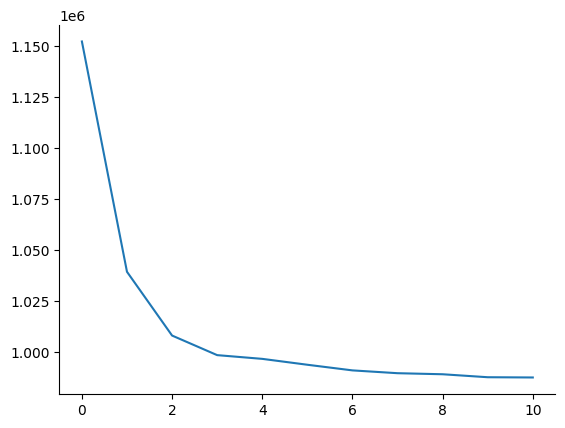

In [322]:
plt.plot(bic_scores)

In [11]:
from scipy.stats import multivariate_normal

In [19]:
best_gmm = gmm_models[3]
plot_results(n_clusters=4,
             X=X,
             z=best_gmm.predict(X),
             mu=best_gmm.mus,
             sigma=best_gmm.sigmas,
             title=f'prediction with {best_m} clusters')

NameError: name 'gmm_models' is not defined

# **Exercice 3**: Importance sampling

In [ ]:
from utils3 import p, q, f

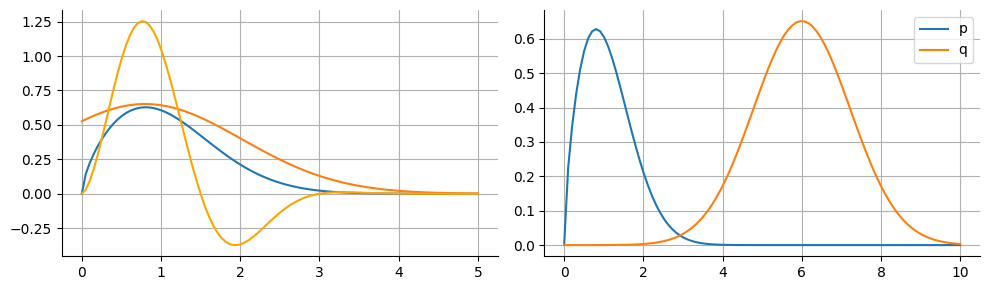

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

x = np.linspace(0, 5, 100)
ax[0].plot(x, p(x), label='p')
ax[0].plot(x, q(x, 0.8, 1.5), label='q')
ax[0].plot(x, p(x)*f(x), label=r'$p \times f$', color='orange')
ax[0].grid()

x = np.linspace(0, 10, 100)
ax[1].plot(x, p(x), label='p')
ax[1].plot(x, q(x, 6, 1.5), label='q')
ax[1].grid()

plt.legend()
plt.tight_layout()
plt.show()

### **3.A - Poor importance sampling**

In [45]:
from utils3 import sample_importance_sampling

# In order to compute the mean and the variance of this estimator,
# we will compute 200 times the estimator, for N = [10, 100, 10^3, 10^4].

num_n = 200
N = [10, 100, 1000, 10000]
q_params = np.array([0.8, 1.5])

importance_weights_1 = []
means, vars = [], []

for n_samples in N:
    ests = []
    for _ in range(num_n):
        sampling_est, weights = sample_importance_sampling(n_samples, f, p, q, q_params)
        ests.append(sampling_est)
    means.append(np.mean(ests))
    vars.append(np.var(ests))
    # we just take the last estimation to store the weights
    importance_weights_1.append([weights])

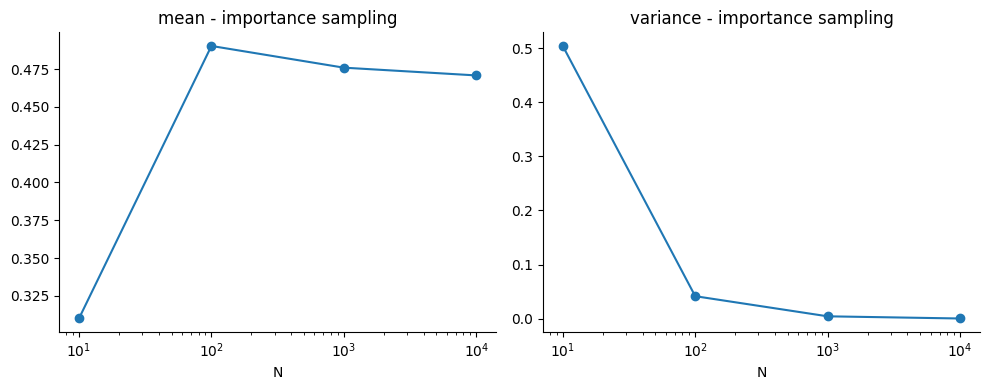

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].set_title('mean - importance sampling')
ax[0].set_xlabel('N')
ax[0].plot(N, means, marker='o')
ax[0].set_xscale('log')

ax[1].set_title('variance - importance sampling')
ax[1].set_xlabel('N')
ax[1].plot(N, vars, marker='o')
ax[1].set_xscale('log')

plt.tight_layout()
plt.show()

In [38]:
# same but for mu = 6 (mean param of q distribution)
q_params = np.array([6, 1.5])
importance_weights_2 = []

means, vars = [], []
for n_samples in N:
    ests = []
    for _ in range(num_n):
        sampling_est, weights = sample_importance_sampling(n_samples, f, p, q, q_params)
        ests.append(sampling_est)
    means.append(np.mean(ests))
    vars.append(np.var(ests))
    
    importance_weights_2.append([weights])

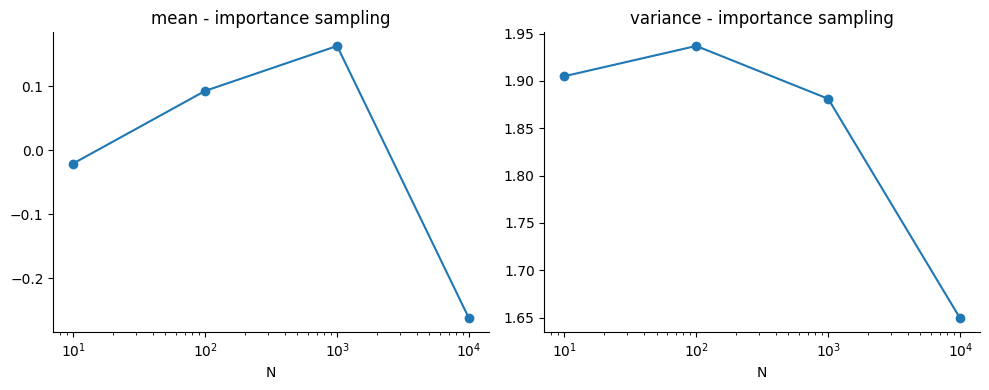

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].set_title('mean - importance sampling')
ax[0].set_xlabel('N')
ax[0].plot(N, means, marker='o')
ax[0].set_xscale('log')

ax[1].set_title('variance - importance sampling')
ax[1].set_xlabel('N')
ax[1].plot(N, vars, marker='o')
ax[1].set_xscale('log')

plt.tight_layout()
plt.show()

In [218]:
# This cell shows us that almost every wheights are zero unless some of them really big

np.squeeze(importance_weights_2[2]) * (np.squeeze(importance_weights_2[2]) > 10)

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

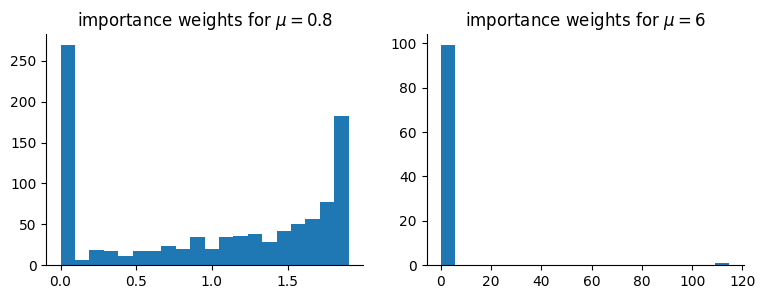

In [15]:
# compare between weights1 and weights2
fig, ax = plt.subplots(1, 2, figsize=(9, 3))

# we fix N at a sufficient sampling rate
# N = 1000

ax[0].hist(importance_weights_1[2], bins=20)
ax[0].set_title(r'importance weights for $\mu = {0.8}$')

ax[1].hist(np.squeeze(importance_weights_2[2])[:100], bins=20)
ax[1].set_title(r'importance weights for $\mu = {6}$')

plt.show()

### **3.B - Adaptive importance sampling**

In [48]:
from utils3 import PopulationMonteCarlo

dim = 5
n_clusters = 5
n_samples = 3000
pmc = PopulationMonteCarlo(n_samples, n_clusters, dim, b=0.4, max_iters=100)

In [49]:
pmc.fit()

In [50]:
from utils1 import get_gmm_samples
X, z = get_gmm_samples(n_clusters, pmc.alphas, pmc.mus, pmc.sigmas, n_samples)

In [51]:
from utils1 import plot_results

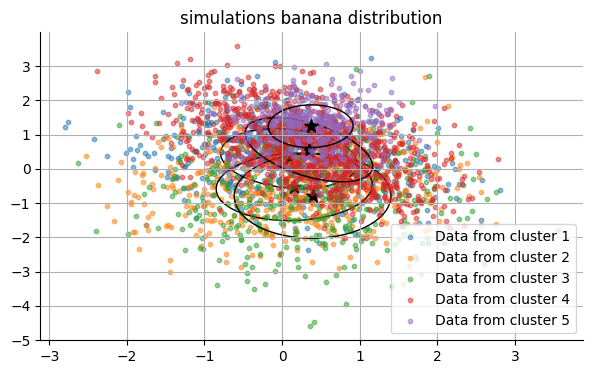

In [52]:
plot_results(n_clusters, X[:,1:3], z, pmc.mus[:, 1:3], pmc.sigmas[:, 1:3, 1:3], title=f'simulations banana distribution')